In [1]:
# A brief about dataset

In [2]:
'''
All tweets from the fearless leader of the United States as of Jan 20th 2020.
Trump Tweets
Tweets from @realdonaldtrump scraped January 20th, 2020
Dataset can be traced from https://www.kaggle.com/austinreese/trump-tweets
'''

'\nAll tweets from the fearless leader of the United States as of Jan 20th 2020.\nTrump Tweets\nTweets from @realdonaldtrump scraped January 20th, 2020\nDataset can be traced from https://www.kaggle.com/austinreese/trump-tweets\n'

In [3]:
# Importing required libraries

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import twitter_samples
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sentiment
from textblob import Word

In [5]:
# Loading dataset

In [6]:
df=pd.read_csv("C://Users//acer//Desktop//1sem//python//trump-tweets//trumptweets.csv")

In [7]:
# Looking at first few rows

In [8]:
df.head(5)

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [9]:
# shape

In [10]:
df.shape

(41122, 9)

In [11]:
# null values

In [12]:
df.isna().sum()

id               0
link             0
content          0
date             0
retweets         0
favorites        0
mentions     18655
hashtags     35312
geo          41122
dtype: int64

In [13]:
# dropping these 3 columns containing null values

In [14]:
df.drop(["mentions","hashtags","geo"],axis=1,inplace=True)

In [15]:
df.shape

(41122, 6)

In [16]:
df.isna().sum()

id           0
link         0
content      0
date         0
retweets     0
favorites    0
dtype: int64

In [17]:
# last few rows

In [18]:
df.tail(5)

,id,link,content,date,retweets,favorites
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921
41121,1219076533354037249,https://twitter.com/realDonaldTrump/status/121...,A great show! Check it out tonight at 9pm. @ F...,2020-01-20 02:57:49,7947,34902


In [19]:
# Id and link columns need to be dropped as they are not useful

In [20]:
df.drop(["id","link"],axis=1,inplace=True)

In [21]:
df.head(5)

,content,date,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965


In [22]:
# we need to process the date column

In [23]:
df["date"]=pd.to_datetime(df["date"])

In [24]:
df["day"]=df["date"].dt.day

In [25]:
df["month"]=df["date"].dt.month

In [26]:
df["year"]=df["date"].dt.year

In [27]:
df["hour"]=df["date"].dt.hour

In [28]:
df["weekday"]=df["date"].dt.weekday

In [29]:
# dropping date column as we have taken all information 

In [30]:
df.drop("date",axis=1,inplace=True)

In [31]:
# Lets look at the table

In [32]:
df.head(5)

,content,retweets,favorites,day,month,year,hour,weekday
0,Be sure to tune in and watch Donald Trump on L...,500,868,4,5,2009,20,0
1,Donald Trump will be appearing on The View tom...,33,273,5,5,2009,3,1
2,Donald Trump reads Top Ten Financial Tips on L...,12,18,8,5,2009,15,4
3,New Blog Post: Celebrity Apprentice Finale and...,11,24,8,5,2009,22,4
4,"""My persona will never be that of a wallflower...",1399,1965,12,5,2009,16,1


In [33]:
# Lets look at the most liked tweet

In [34]:
np.max(df["favorites"])

857678

In [35]:
df[df.favorites==np.max(df["favorites"])].index[0]

38625

In [36]:
df["content"][df[df.favorites==np.max(df["favorites"])].index[0]]

'A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!'

In [37]:
# another way of showing top 5 most liked tweets

In [38]:
df["content"][df["favorites"].nlargest(5).index]

38625    A$AP Rocky released from prison and on his way...
40959                           pic.twitter.com/VXeKiVzpTf
40990    All is well! Missiles launched from Iran at tw...
40868                                     MERRY CHRISTMAS!
38394    Just spoke to @ KanyeWest about his friend A$A...
Name: content, dtype: object

In [39]:
# bottom 5 tweets having lowest likes

In [40]:
df["content"][df["favorites"].nsmallest(5).index]

429     Listen in live NOW to the new radio show @ Ame...
3238    @ MaryEnglish67 @ USAToday Sometimes that's ne...
3261        @ bodysouls @ digitaljournal Great statement.
3264       @GiftOfGod1994 @ digitaljournal Good response.
3268        @ ochughes True, not much gets done that way.
Name: content, dtype: object

In [41]:
# top 5 most retweeted

In [42]:
df["content"][df["retweets"].nlargest(5).index]

32059       # FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg
30895                   TODAY WE MAKE AMERICA GREAT AGAIN!
15535    Are you allowed to impeach a president for gro...
38625    A$AP Rocky released from prison and on his way...
33061    Why would Kim Jong-un insult me by calling me ...
Name: content, dtype: object

In [43]:
# bottom 5 least retweeted

In [44]:
df["content"][df["retweets"].nsmallest(5).index]

3261        @ bodysouls @ digitaljournal Great statement.
3269    @ Travis_George Thanks, but I have a lot of bu...
3271    @ Iona1991 Thank you, and happy to hear you en...
3283                      @lazymag @ USAToday Good point!
3284                  @ maynor1972 @ usatoday Good choice
Name: content, dtype: object

In [45]:
# taking all content together

In [46]:
tweets=df["content"].values

In [47]:
# converting it to str

In [48]:
tweets=str(tweets)

In [49]:
len(tweets)

1006

In [50]:
words=stopwords.words("english")

In [51]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [52]:
# As it takes much time in classifying each text we are taking only top 100 rows

In [53]:
df=df.iloc[:100]

In [54]:
df["content"].apply(nltk.sentiment.util.demo_liu_hu_lexicon)

Positive
Positive
Positive
Neutral
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Neutral
Positive
Neutral
Positive
Positive
Positive
Positive
Negative
Positive
Neutral
Positive
Negative
Positive
Neutral
Positive


0     None
1     None
2     None
3     None
4     None
      ... 
95    None
96    None
97    None
98    None
99    None
Name: content, Length: 100, dtype: object

In [55]:
# As results are not getting pasted under new column we have copied and pasted in
# new csv sheet. Importing that sheet now and concat it with table

In [57]:
fd=pd.read_csv("C://Users//acer//Desktop//1sem//python//trump-tweets//sents.csv")

In [ ]:
# concating both dataframes

In [58]:
df=pd.concat([df,fd],axis=1)

In [ ]:
# Looking at the new dataframe

In [59]:
df.head(5)

,content,retweets,favorites,day,month,year,hour,weekday,sentiments
0,Be sure to tune in and watch Donald Trump on L...,500,868,4,5,2009,20,0,Positive
1,Donald Trump will be appearing on The View tom...,33,273,5,5,2009,3,1,Positive
2,Donald Trump reads Top Ten Financial Tips on L...,12,18,8,5,2009,15,4,Positive
3,New Blog Post: Celebrity Apprentice Finale and...,11,24,8,5,2009,22,4,Neutral
4,"""My persona will never be that of a wallflower...",1399,1965,12,5,2009,16,1,Positive


In [ ]:
# counting number of tweets in each category

In [60]:
df.groupby("sentiments").size()

sentiments
Negative     5
Neutral     11
Positive    84
dtype: int64

In [ ]:
# Plotting in bar for better representation

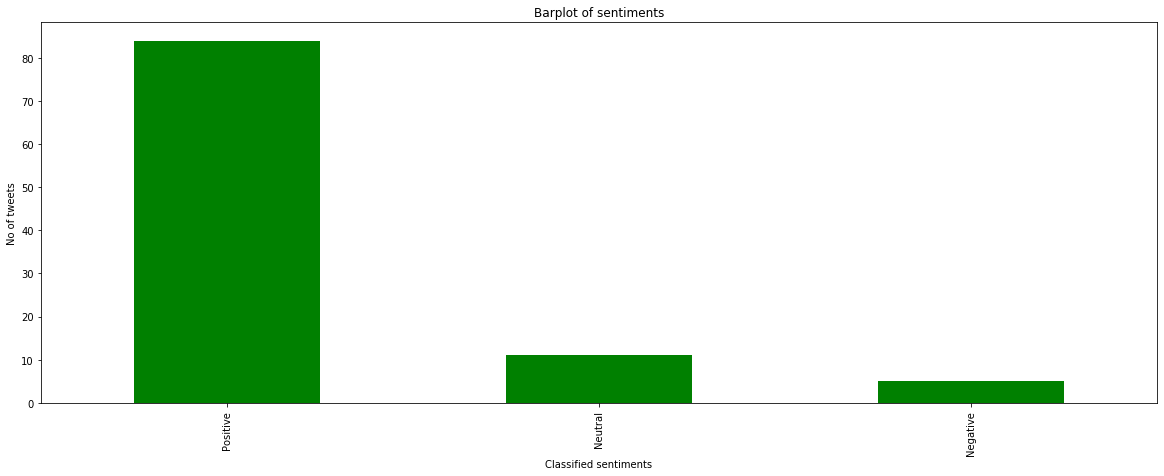

In [61]:
df["sentiments"].value_counts().head(100).plot.bar(color="g",figsize=(20,7))
plt.title("Barplot of sentiments")
plt.xlabel("Classified sentiments")
plt.ylabel("No of tweets")
plt.show()

In [ ]:
# Lets try to represent in a Pie chart

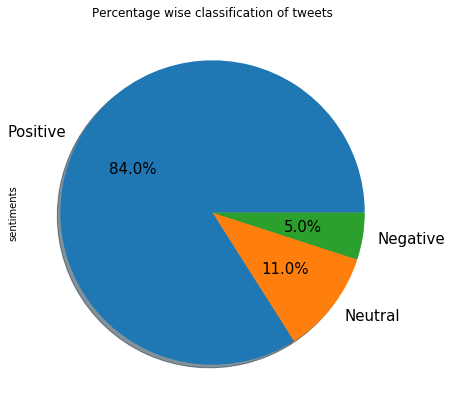

In [62]:
df["sentiments"].value_counts().head(100).plot.pie(figsize=(20,7),shadow=True,
fontsize=15,autopct="%.1f%%")
plt.title("Percentage wise classification of tweets")
plt.show()

In [ ]:
# Looking at top 5 tweets under Negative sentiments

In [63]:
df.loc[df["sentiments"]=="Negative"][["content","favorites"]].sort_values(ascending=False,by="favorites").head(5)

,content,favorites
26,"RE: FB Vanity URLs: SF Chronicle - ""David Beck...",17
42,Reminder: The Miss Universe competition will b...,12
96,"Looking forward to the 2010 Miss USA Pageant, ...",7
41,Watch the Miss Universe competition LIVE from ...,6
92,"Looking forward to the 2010 Miss USA Pageant, ...",5


In [ ]:
# Looking at top 5 tweets under Positive sentiments

In [64]:
df.loc[df["sentiments"]=="Positive"][["content","favorites"]].sort_values(ascending=False,by="favorites").head(5)

,content,favorites
58,"from Donald Trump: ""I saw Lady Gaga last night...",8117
4,"""My persona will never be that of a wallflower...",1965
0,Be sure to tune in and watch Donald Trump on L...,868
53,Wishing you and yours a very Happy and Bountif...,573
43,- Donald Trump bids to buy the Oreo Double Stu...,373


In [ ]:
# Looking at top 5 tweets under Neutral sentiments

In [65]:
df.loc[df["sentiments"]=="Neutral"][["content","favorites"]].sort_values(ascending=False,by="favorites").head(5)

,content,favorites
85,Melania and I saw American Idiot on Broadway l...,5260
84,Tune in to The Marriage Ref onThursday night a...,133
22,"“If you don't have problems, you're pretending...",31
5,"Miss USA Tara Conner will not be fired - ""I've...",26
3,New Blog Post: Celebrity Apprentice Finale and...,24


In [ ]:
# Lets classify sentiments on the basis of hour of the day

In [66]:
pd.crosstab(df.hour,df.sentiments)

sentiments,Negative,Neutral,Positive
hour,,,
0,0,0,3
1,0,0,2
3,0,0,1
4,0,0,1
15,1,1,15
16,1,1,19
17,0,1,12
18,1,3,9
19,0,1,5


In [ ]:
# Lets visualize this table in bar plot

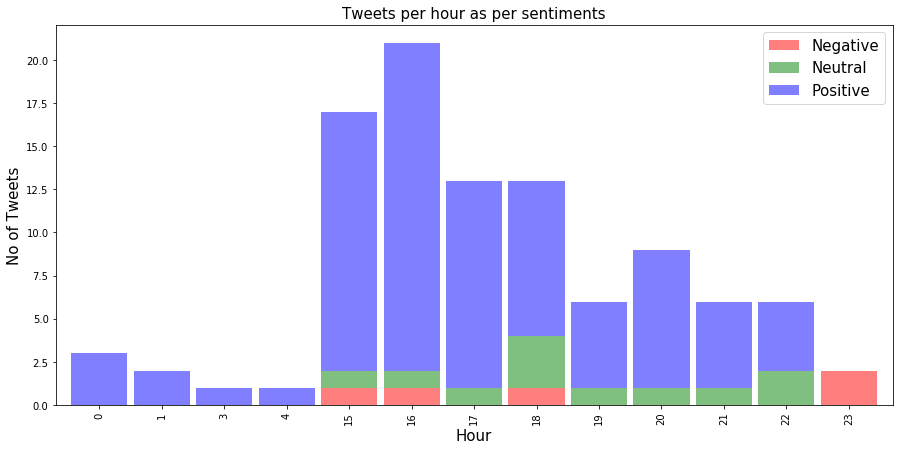

In [67]:
pd.crosstab(index=df["hour"],columns=df["sentiments"]).plot(kind="bar",
fontsize=10,color= ['r','g','b'],figsize=(15,7),alpha=0.5,width=0.9,stacked=True)

plt.title("Tweets per hour as per sentiments",fontsize=15)
plt.xlabel("Hour",fontsize=15)
plt.ylabel("No of Tweets",fontsize=15)
plt.legend(fontsize=15)
plt.show()


In [ ]:
# Taking a closer look at 16 hour

In [68]:
pd.crosstab(index=df["hour"]==16,columns=df["sentiments"])

sentiments,Negative,Neutral,Positive
hour,,,
False,4,10,65
True,1,1,19


In [ ]:
# Lets visualize it through bar plot

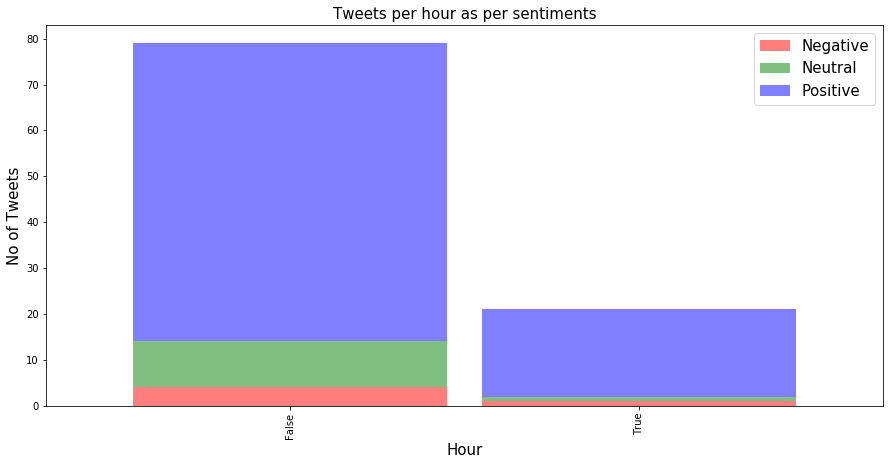

In [69]:
pd.crosstab(index=df["hour"]==16,columns=df["sentiments"]).plot(kind="bar",
fontsize=10,color= ['r','g','b'],figsize=(15,7),alpha=0.5,width=0.9,stacked=True)

plt.title("Tweets per hour as per sentiments",fontsize=15)
plt.xlabel("Hour",fontsize=15)
plt.ylabel("No of Tweets",fontsize=15)
plt.legend(fontsize=15)
plt.show()


In [ ]:
# Lets analyze sentiments group by weekday

In [70]:
pd.crosstab(index=df["weekday"],columns=df["sentiments"])

sentiments,Negative,Neutral,Positive
weekday,,,
0,1,1,14
1,0,4,17
2,0,3,15
3,2,0,15
4,1,3,15
5,0,0,2
6,1,0,6


In [ ]:
# visualizing this on bar plot

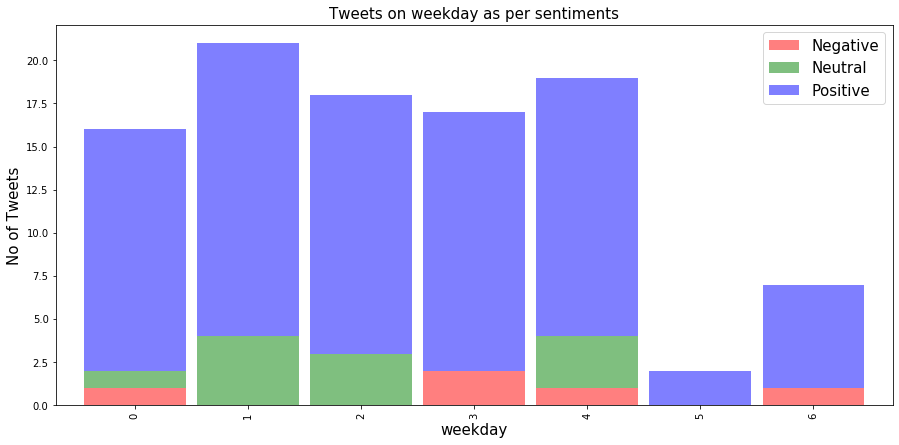

In [71]:
pd.crosstab(index=df["weekday"],columns=df["sentiments"]).plot(kind="bar",
fontsize=10,color= ['r','g','b'],figsize=(15,7),alpha=0.5,width=0.9,stacked=True)

plt.title("Tweets on weekday as per sentiments",fontsize=15)
plt.xlabel("weekday",fontsize=15)
plt.ylabel("No of Tweets",fontsize=15)
plt.legend(fontsize=15)
plt.show()


In [ ]:
# Lets analyze weekday 1 carefully

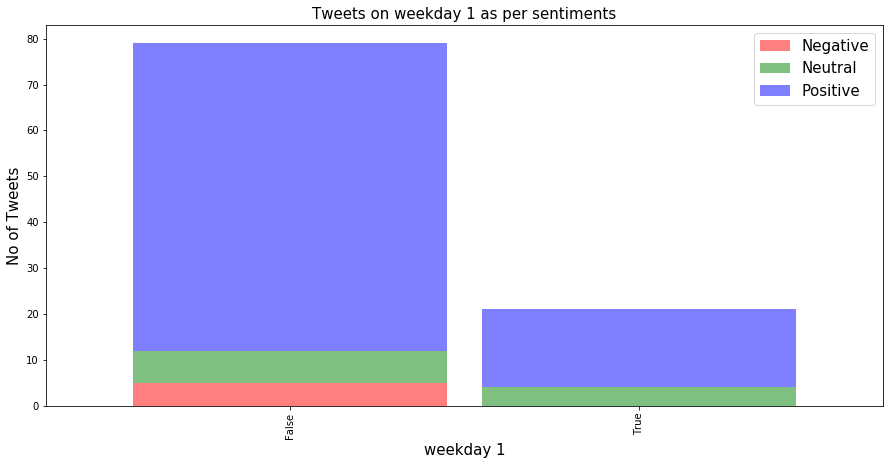

In [72]:
pd.crosstab(index=df["weekday"]==1,columns=df["sentiments"]).plot(kind="bar",
fontsize=10,color= ['r','g','b'],figsize=(15,7),alpha=0.5,width=0.9,stacked=True)

plt.title("Tweets on weekday 1 as per sentiments",fontsize=15)
plt.xlabel("weekday 1",fontsize=15)
plt.ylabel("No of Tweets",fontsize=15)
plt.legend(fontsize=15)
plt.show()


In [ ]:
# Commmon words removal

In [ ]:
# we can see top 15 words which are repeting most number of times

In [73]:
pd.Series(" ".join(df["content"]).split()).value_counts().head(15)

the       51
Trump     48
and       45
to        43
on        39
a         38
Donald    32
of        30
for       23
in        21
The       21
-         20
be        19
J.        18
is        17
dtype: int64

In [ ]:
# we can see bottom 15 words which are repeting east number of times

In [74]:
pd.Series(" ".join(df["content"]).split()).value_counts().tail(15)

self."                       1
http://tinyurl.com/6asujj    1
Reality                      1
thousands                    1
achiever                     1
http://bit.ly/DdD2A          1
Father's                     1
something                    1
SF                           1
Fakih.                       1
summer                       1
tonight,                     1
An                           1
calendar:                    1
run                          1
dtype: int64

In [ ]:
# to remove these words from dataframe

In [ ]:
'''
#common_words = list(common_words.index)
#tweets_SA['text'] = tweets_SA['text'].apply(lambda x: " ".join(x for x in x.split() if x not in common_words))
#tweets_SA['text'].head()
'''

In [ ]:
# Tokenization

In [75]:
df["tokenized text"]=df["content"].apply(word_tokenize)

In [ ]:
# Lemmatization: converts word into its root word rather than just stripping
#  suffices as in the case of stemming

In [76]:
df["lemmiatized text"]=df["content"].apply(lambda x: " ".join([Word(word)
.lemmatize() for word in x.split()]))

In [ ]:
# Lets look at the dataframe

In [77]:
df.head(5)

,content,retweets,favorites,day,month,year,hour,weekday,sentiments,tokenized text,lemmiatized text
0,Be sure to tune in and watch Donald Trump on L...,500,868,4,5,2009,20,0,Positive,"[Be, sure, to, tune, in, and, watch, Donald, T...",Be sure to tune in and watch Donald Trump on L...
1,Donald Trump will be appearing on The View tom...,33,273,5,5,2009,3,1,Positive,"[Donald, Trump, will, be, appearing, on, The, ...",Donald Trump will be appearing on The View tom...
2,Donald Trump reads Top Ten Financial Tips on L...,12,18,8,5,2009,15,4,Positive,"[Donald, Trump, reads, Top, Ten, Financial, Ti...",Donald Trump read Top Ten Financial Tips on La...
3,New Blog Post: Celebrity Apprentice Finale and...,11,24,8,5,2009,22,4,Neutral,"[New, Blog, Post, :, Celebrity, Apprentice, Fi...",New Blog Post: Celebrity Apprentice Finale and...
4,"""My persona will never be that of a wallflower...",1399,1965,12,5,2009,16,1,Positive,"[``, My, persona, will, never, be, that, of, a...","""My persona will never be that of a wallflower..."


In [ ]:
# making wordcloud

In [ ]:
'''
Removal of Stop Words - performed after the sentiment analysis
Stop words (or commonly occurring words) should be removed from the text data before making the WordCloud. They were stil 
included while making the sentiment analysis, though.
For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries, like the NLTK library.
'''

In [79]:
import nltk
import re
nltk.download('punkt')
nltk.download("stopwords")
stop = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
df["lemmatized text"]=df["lemmiatized text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [81]:
df["lemmatized text"].head(5)

0    Be sure tune watch Donald Trump Late Night Dav...
1    Donald Trump appearing The View tomorrow morni...
2    Donald Trump read Top Ten Financial Tips Late ...
3    New Blog Post: Celebrity Apprentice Finale Les...
4    "My persona never wallflower - I’d rather buil...
Name: lemmatized text, dtype: object

In [ ]:
# combining all tweets in an array for wordcloud using .tolist()

In [82]:
text_array=df["lemmatized text"].values.tolist()

In [83]:
len(text_array)

100

In [ ]:
'''
Removal of the prefixes https//: and http//:
I decided to remove these since they do not add any real value and will also be over-represented when creating the WordCloud
A separate analysis could be done focusing only on the tweets with links!
'''

In [ ]:
# We are joining all sentences as if one sentence

In [84]:
"".join(text_array)

'Be sure tune watch Donald Trump Late Night David Letterman present Top Ten List tonight!Donald Trump appearing The View tomorrow morning discus Celebrity Apprentice new book Think Like A Champion!Donald Trump read Top Ten Financial Tips Late Show David Letterman: http://tinyurl.com/ooafwn - Very funny!New Blog Post: Celebrity Apprentice Finale Lessons Learned Along Way: http://tinyurl.com/qlux5e"My persona never wallflower - I’d rather build wall cling them" --Donald J. TrumpMiss USA Tara Conner fired - "I\'ve always believer second chances." say Donald TrumpListen interview Donald Trump discussing new book, Think Like A Champion: http://tinyurl.com/qs24vl"Strive wholeness keep sense wonder intact." --Donald J. Trump http://tinyurl.com/pqpfvmEnter "Think Like A Champion" signed book keychain contest: http://www.trumpthinklikeachampion.com/contest/"When achiever achieves, plateau, it’s beginning." --Donald J. Trump http://tinyurl.com/pqpfvm"Don’t afraid unique - like afraid best self."

In [85]:
text_array

['Be sure tune watch Donald Trump Late Night David Letterman present Top Ten List tonight!',
 'Donald Trump appearing The View tomorrow morning discus Celebrity Apprentice new book Think Like A Champion!',
 'Donald Trump read Top Ten Financial Tips Late Show David Letterman: http://tinyurl.com/ooafwn - Very funny!',
 'New Blog Post: Celebrity Apprentice Finale Lessons Learned Along Way: http://tinyurl.com/qlux5e',
 '"My persona never wallflower - I’d rather build wall cling them" --Donald J. Trump',
 'Miss USA Tara Conner fired - "I\'ve always believer second chances." say Donald Trump',
 'Listen interview Donald Trump discussing new book, Think Like A Champion: http://tinyurl.com/qs24vl',
 '"Strive wholeness keep sense wonder intact." --Donald J. Trump http://tinyurl.com/pqpfvm',
 'Enter "Think Like A Champion" signed book keychain contest: http://www.trumpthinklikeachampion.com/contest/',
 '"When achiever achieves, plateau, it’s beginning." --Donald J. Trump http://tinyurl.com/pqpfvm

In [86]:
strings="".join(text_array)

In [ ]:
# removing all https 

In [87]:
cleen_tweet=re.sub("http\S+\s*", "",strings)

In [ ]:
'''
Final format of the words used
The WordClouds are built on tweets on which lemmatization was performed but not common words removal nor rare words removal.
'''

In [88]:
from wordcloud import WordCloud

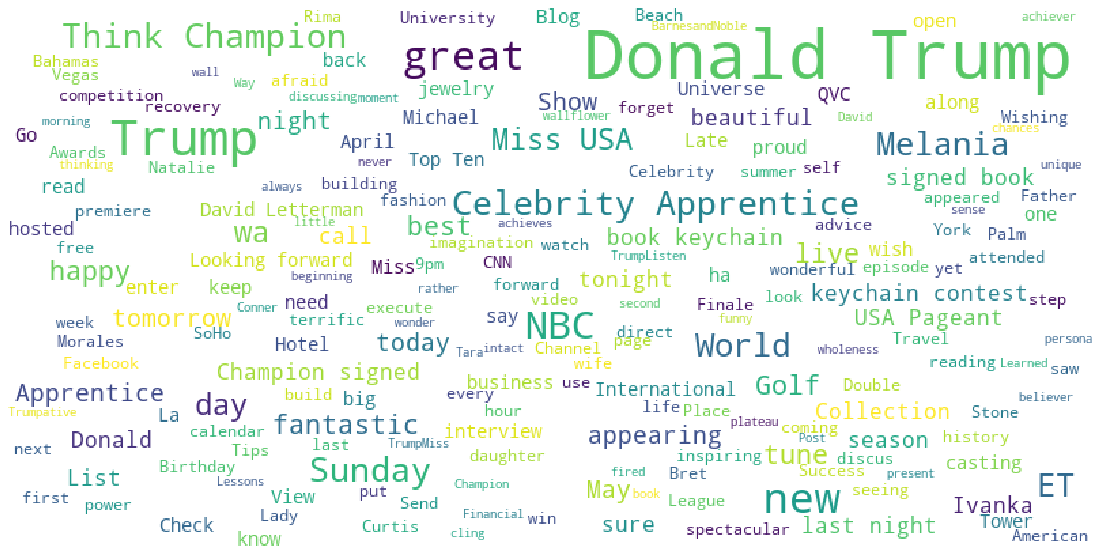

In [89]:
cloud = WordCloud(background_color="white", random_state=42, width=800, height=400, max_words=200, prefer_horizontal=1.0,font_step
=1 ,max_font_size=50,).generate(cleen_tweet)

plt.figure( figsize=(20,10), facecolor='w') #figsize adjusts resolution!! 200x100 is already pretty good!
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
# separating tweets into different dataframes based on sentiments

In [ ]:
# Neutral tweets dataframe

In [90]:
neutral_tweets=df.query("sentiments=='Neutral'")

In [91]:
neutral_tweets.head(3)

,content,retweets,favorites,day,month,year,hour,weekday,sentiments,tokenized text,lemmiatized text,lemmatized text
3,New Blog Post: Celebrity Apprentice Finale and...,11,24,8,5,2009,22,4,Neutral,"[New, Blog, Post, :, Celebrity, Apprentice, Fi...",New Blog Post: Celebrity Apprentice Finale and...,New Blog Post: Celebrity Apprentice Finale Les...
5,"Miss USA Tara Conner will not be fired - ""I've...",27,26,12,5,2009,21,1,Neutral,"[Miss, USA, Tara, Conner, will, not, be, fired...","Miss USA Tara Conner will not be fired - ""I've...","Miss USA Tara Conner fired - ""I've always beli..."
12,"""...these days...we could all use a little of ...",18,17,19,5,2009,19,1,Neutral,"[``, ..., these, days, ..., we, could, all, us...","""...these days...we could all use a little of ...","""...these days...we could use little power Tru..."


In [ ]:
# sorting as per favorites

In [94]:
neutral_fav=neutral_tweets.sort_values("favorites",ascending=False)

In [95]:
neutral_fav.head(3)

,content,retweets,favorites,day,month,year,hour,weekday,sentiments,tokenized text,lemmiatized text,lemmatized text
85,Melania and I saw American Idiot on Broadway l...,3321,5260,21,4,2010,16,2,Neutral,"[Melania, and, I, saw, American, Idiot, on, Br...",Melania and I saw American Idiot on Broadway l...,Melania I saw American Idiot Broadway last nig...
84,Tune in to The Marriage Ref onThursday night a...,133,133,20,4,2010,22,1,Neutral,"[Tune, in, to, The, Marriage, Ref, onThursday,...",Tune in to The Marriage Ref onThursday night a...,Tune The Marriage Ref onThursday night 10 p.m....
22,"“If you don't have problems, you're pretending...",12,31,5,6,2009,20,4,Neutral,"[“, If, you, do, n't, have, problems, ,, you, ...","“If you don't have problems, you're pretending...","“If problems, pretending run business.” –Donal..."


In [ ]:
# sorting as per retweets

In [98]:
neutral_ret=neutral_tweets.sort_values("retweets",ascending=False)

In [ ]:
# Plotting hour vs favorites

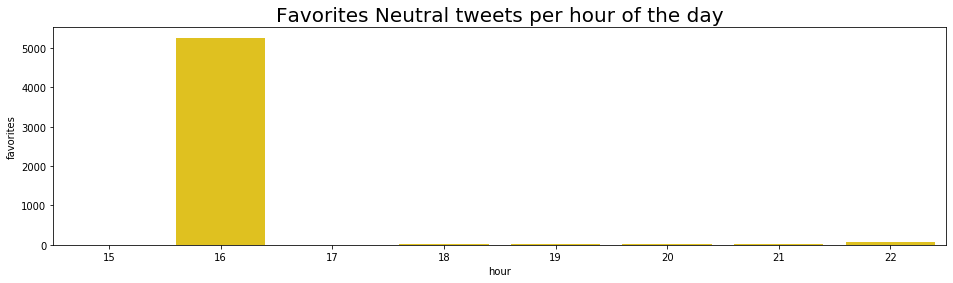

In [99]:
f, ax = plt.subplots(figsize=(16, 4))
plt.title("Favorites Neutral tweets per hour of the day", fontsize=20)
sns.barplot( x='hour', y='favorites',  data=neutral_fav,color='gold', ci=None);
plt.show()

In [ ]:
# putting all tweets together 

In [103]:
tweets_array=neutral_tweets["lemmatized text"].values.tolist()

In [ ]:
# combining all tweets as they are one tweet

In [105]:
tweets_str="".join(tweets_array)

In [ ]:
# removing url from tweets_str

In [108]:
tweets_str=re.sub("http\S+\s*","",tweets_str)

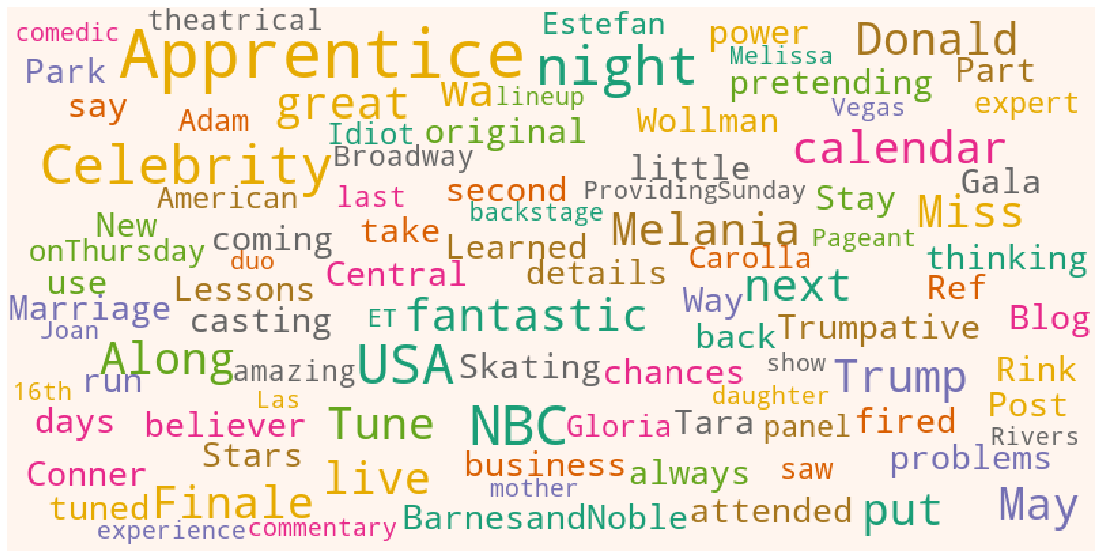

In [109]:
cloud = WordCloud(background_color="seashell", random_state=42, width=800, height=400, max_words=150, colormap='Dark2',
prefer_horizontal=1.0,max_font_size=50,).generate(tweets_str)

plt.figure( figsize=(20,10), facecolor='w') 
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
# Positive tweeets

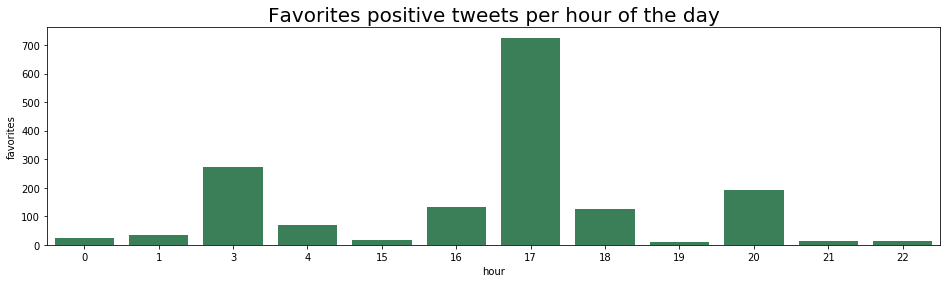

In [111]:
positive_tweets=df.query("sentiments=='Positive'")
positive_fav=positive_tweets.sort_values("favorites",ascending=False)
positive_ret=positive_tweets.sort_values("retweets",ascending=False)
f, ax = plt.subplots(figsize=(16, 4))
plt.title("Favorites positive tweets per hour of the day", fontsize=20)
sns.barplot( x='hour', y='favorites',  data=positive_fav,color='seagreen', ci=None);
plt.show()
tweets_array=positive_tweets["lemmatized text"].values.tolist()
tweets_str="".join(tweets_array)
tweets_str=re.sub("http\S+\s*","",tweets_str)

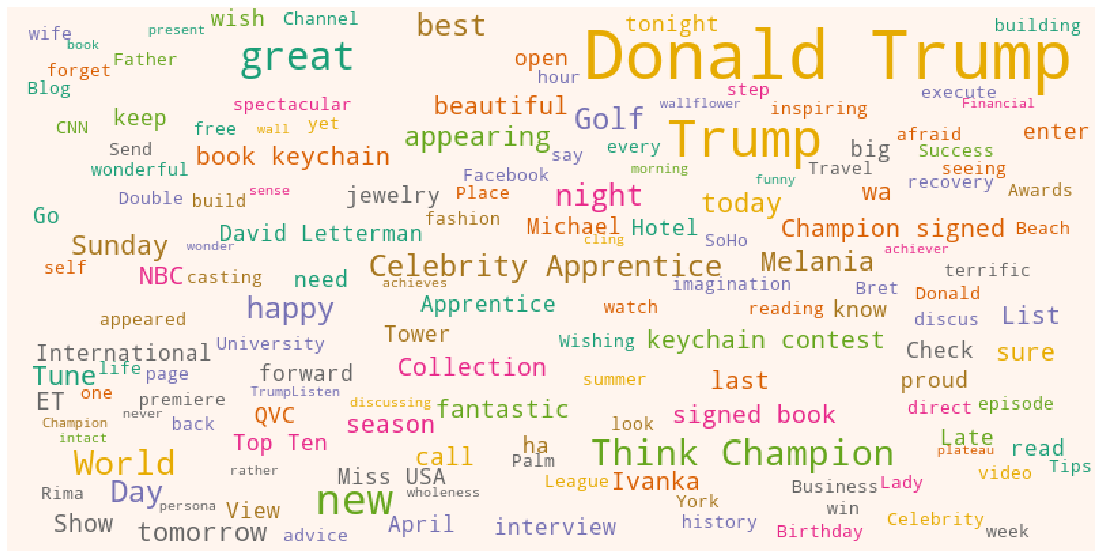

In [116]:
cloud = WordCloud(background_color="seashell", random_state=42, width=800, height=400, max_words=150, colormap='Dark2',
prefer_horizontal=1.0,max_font_size=50,).generate(tweets_str)

plt.figure( figsize=(20,10), facecolor='w') 
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
# Negative twwets

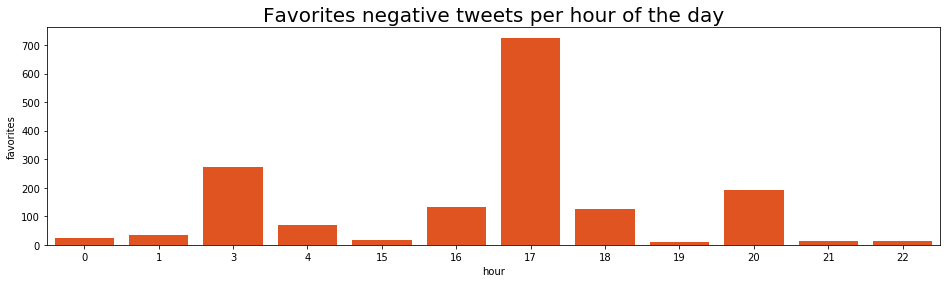

In [117]:
negative_tweets=df.query("sentiments=='Negative'")
negative_fav=negative_tweets.sort_values("favorites",ascending=False)
negative_ret=negative_tweets.sort_values("retweets",ascending=False)
f, ax = plt.subplots(figsize=(16, 4))
plt.title("Favorites negative tweets per hour of the day", fontsize=20)
sns.barplot( x='hour', y='favorites',  data=positive_fav,color='orangered', ci=None);
plt.show()
tweets_array=negative_tweets["lemmatized text"].values.tolist()
tweets_str="".join(tweets_array)
tweets_str=re.sub("http\S+\s*","",tweets_str)

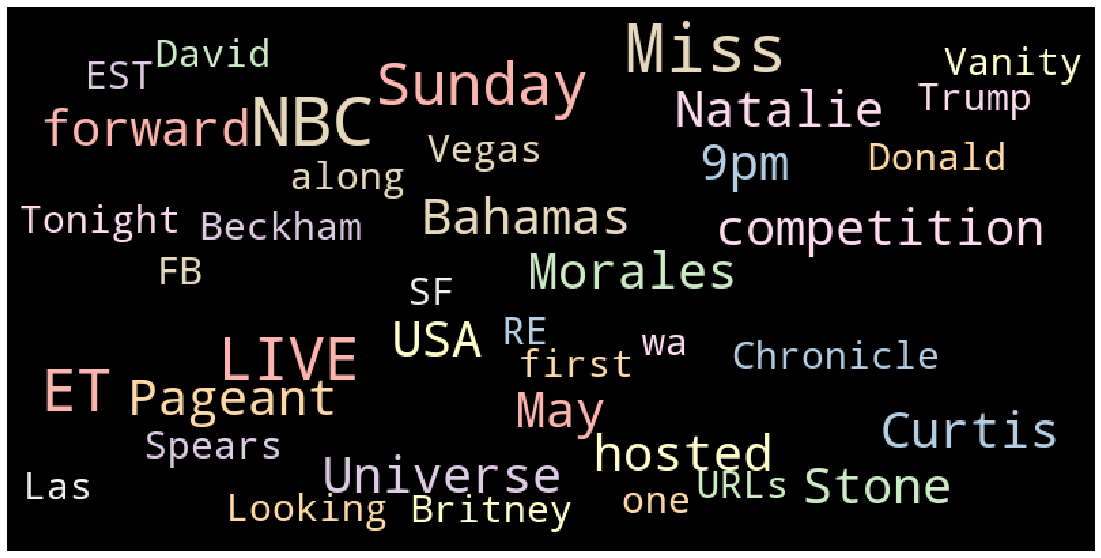

In [118]:
cloud = WordCloud(background_color="black", random_state=42, width=800, height=400, max_words=150, colormap='Pastel1',
prefer_horizontal=1.0,max_font_size=50,).generate(tweets_str)

plt.figure( figsize=(20,10), facecolor='w') 
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
# Counting avg fav and retweet per sentimets

In [ ]:
# Avg neutral fav

In [120]:
neut_avg_fav = neutral_tweets['favorites'].mean()
neut_avg_fav

502.90909090909093

In [122]:
#Avg Neutral Retweeted
neut_avg_rt = neutral_tweets['retweets'].mean()
neut_avg_rt

330.45454545454544

In [123]:
#Avg Positive Favorited
posit_avg_fav = positive_tweets['favorites'].mean()
posit_avg_fav

176.14285714285714

In [124]:
#Avg Positive Retweeted
posit_avg_rt = positive_tweets['retweets'].mean()
posit_avg_rt

166.03571428571428

In [125]:
#Avg Negative Favorited
negat_avg_fav = negative_tweets['favorites'].mean()
negat_avg_fav

9.4

In [126]:
#Avg Negative Retweeted
negat_avg_rt = negative_tweets['retweets'].mean()
negat_avg_rt

15.2

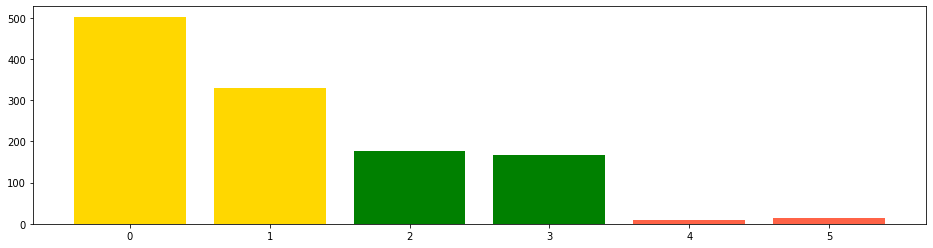

In [127]:
f, ax = plt.subplots(figsize=(16, 4))
values=[neut_avg_fav,neut_avg_rt, posit_avg_fav, posit_avg_rt, negat_avg_fav, negat_avg_rt ]
#colors = ['y','y','g','g', 'r', 'r']
colors =[ '#FFD700', '#FFD700', 'g', 'g', '#FF6347','#FF6347']
plt.bar(range(0,6), values, color=colors)
plt.show()

In [ ]:
# Thank you